# Laboratorio: Usos reales de la morfología matemática
### **Nombres:**  Ponce Proaño Miguel Alejandro 
### **Asignatura:**  Percepción Computacional
### **Actividad:** Nro. 3 - mia03_t10_lab.docx

# Introducción

Para el desarrollo del ejercicio se realizarán varias propuestas basadas en el uso de técnicas umbralización adaptativa más técnicas de morfología matemática, buscando devolver una imagen parecida a la que se muestra en la figura (1).
* La primera propuesta consiste en contar los objetos dentro en la imagen utilizando técnicas de morfología matemática para poder reducir esa parte colindante, y poder contar los objetos por separado.
* La segunda propuesta se tomará ventaja del poder de procesamiento de varios algoritmos que utilizaran una combinación de varias técnicas de morfología para procesar las imágenes y tratar de determinar con cuál se ha obtenido mejores resultados. 
* Finalmente utilizando el teorema de empaquetamiento de círculos, las propiedades de regiones de skimage y con el cálculo de varios radios y pesos en función de muestras tomadas de la imagen; se buscará maximizar el número de círculos contenidos en las dimensiones de la imagen.

Figura(1) Posible resultado:
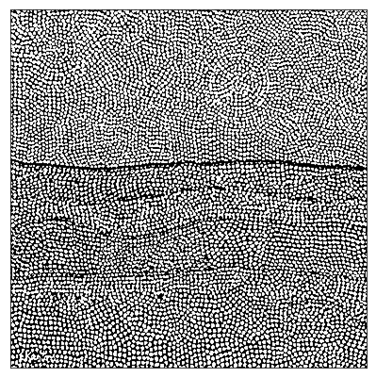

# Inicialización

In [1]:
import numpy as np
import math
from skimage import io
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [3]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [4]:
from scipy import ndimage as ndi
from skimage.segmentation import clear_border

In [5]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

# Constantes

Definición de las constantes que serán utilizadas para el desarrollo del ejercicio.
* **imagenes_cercanas:** Es un diccionario que será utilizado para guardar aquellas imágenes más parecidas a la imagen objetivo.
* **n_iteraciones:** Es el número de iteraciones máximas al ejecutar los métodos de maximización de la cantidad de puntos.
* **min_area_region** y **max_area_region:** Son valores de tolerancia para filtrar aquellos objetos que son muy grandes y excluir aquellos resultados que se puedan considerar como ruido. 
* **max_top_imagenes:** Es la cantidad imágenes top que serán mostradas como resultado de varias combinaciones de la aplicación de operadores y morfologías.
* **tolerancia:** Valor de tolerancia en pixeles respecto de las longitudes de los círculos. 


In [6]:
imagenes_cercanas=dict()
n_iteraciones = 4
min_area_region = 5
max_area_region = 450
max_top_imagenes = 3
tolerancia = 4

## Cargar la imagen

In [7]:
pintura_puntos = rgb2gray(io.imread(fname='img/Pintura_Puntos.jpg'))

Se muestra la imagen en blanco y negro sobre la cual se desarrollará el laboratorio.

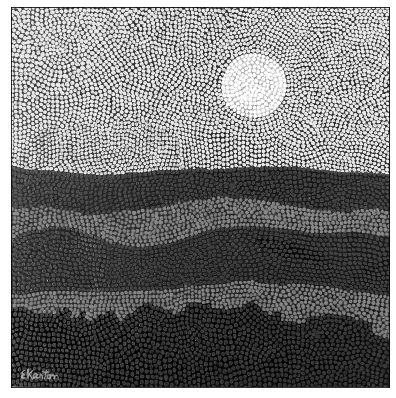

In [8]:
imshow(pintura_puntos)

# 1.- Primera propuesta

Esta propuesta se desarrollará con el siguiente procedimiento:
* Primer paso: Probar los algoritmos de umbralización que están incluidos en las librerías. 
* Segundo paso: Contar el número de círculos en la imagen resultado del paso anterior.
* Tercer paso: Utilizar morfología matemática para ver cómo varía el número de círculos detectados.


## Aplicación de varios algoritmos de umbralización

Se define la función **contar_regiones** la cual hace uso de las constantes **min_area_region** y **max_area_region**, para descartar posibles ruidos producidos u objetos muy grandes. Si los valores de las constantes son ceros, no realizara ningún filtro.

In [9]:
def contar_regiones(imagen):
    label_imagen = label(imagen,connectivity=1)    
    if min_area_region == 0 and max_area_region == 0:
        reg_props = regionprops(label_imagen)
        return len(reg_props)
    else:
        contador = 0
        for region in regionprops(label_imagen):        
            if min_area_region < region.area  and region.area< max_area_region:            
                contador += 1
        return contador

### Análisis umbral threshold_otsu

El algoritmo **threshold_otsu** se fundamenta en el método de Otsu, y es utilizado para realizar una umbralización automática la cual separa los pixeles en dos clases como son foreground y background.

Se implementa el uso del umbral **threshold_otsu**, el cual está muy lejos de la imagen objetivo ver Figura(1).

Nro. círculos: 1621


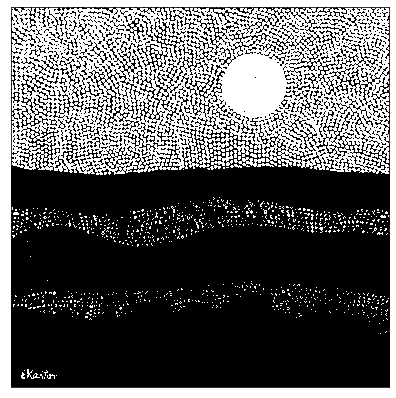

In [10]:
val_otsu = threshold_otsu(pintura_puntos)
img_otsu = pintura_puntos>val_otsu
print("Nro. círculos:",contar_regiones(img_otsu))
imshow(img_otsu)

### Análisis umbral threshold_local

Threshold_local es un algoritmo de umbral adaptativo o dinámico. El valor umbral es la media ponderada entre las vecindades locales de un píxel y esto menos una constante. Alternativamente, este umbral puede determinarse dinámicamente mediante una función determinada ya sea la media, mediana o gauss.

Se utiliza una ventana de 5 pixeles y el método basado en la media. Se implementa la función **threshold_local**, el resultado no es parecido al posible resultado. Luego se realizará una serie de pruebas actualizando los parámetros. Incluso si el número de objetos encontrados es muy alto se observar que los círculos perdieron su forma original y el resultado posiblemente es un error.

Nro. círculos: 10351


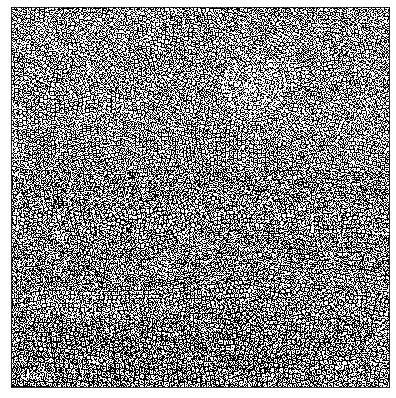

In [11]:
val_local=threshold_local(pintura_puntos, 5, 'mean')
img_local = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local))
imshow(img_local)

Se modifica el parámetro de ventana para la función **threshold_local**, luego se obtiene un resultado muy parecido a la imagen objetivo ver Figura(1). El número de círculos encontrados en la imagen se puede considerar representativo.

Nro. círculos: 5474


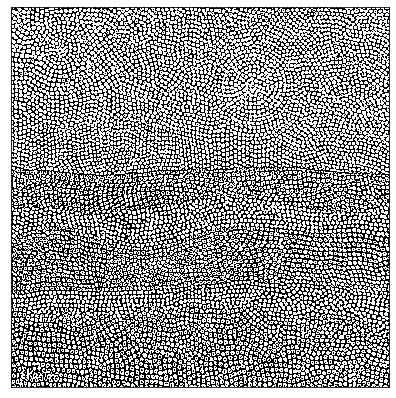

In [12]:
val_local=threshold_local(pintura_puntos, 15, 'mean')
img_local = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local))
imshow(img_local)
imagenes_cercanas["threshold_local_mean-15"]=img_local

Se incrementa el parámetro de ventana para la función **threshold_local**, luego se obtiene un resultado muy parecido a la imagen objetivo ver Figura(1).

Nro. círculos: 4482


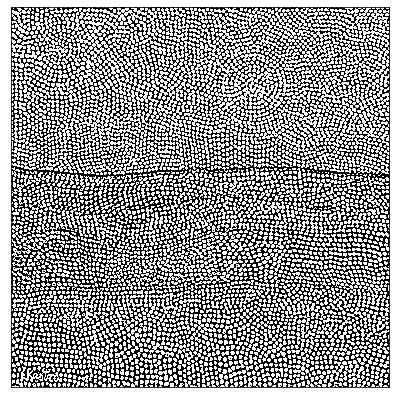

In [13]:
val_local=threshold_local(pintura_puntos, 27, 'mean')
img_local_mean = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local_mean))
imshow(img_local_mean)
imagenes_cercanas["threshold_local_mean-27"]=img_local_mean

Se modifica los parámetros de ventana y método  para la función **threshold_local**, luego se obtiene un resultado parecido a la imagen objetivo ver Figura(1). El número de círculos encontrados en la imagen se puede considerar representativo.

Nro. círculos: 5021


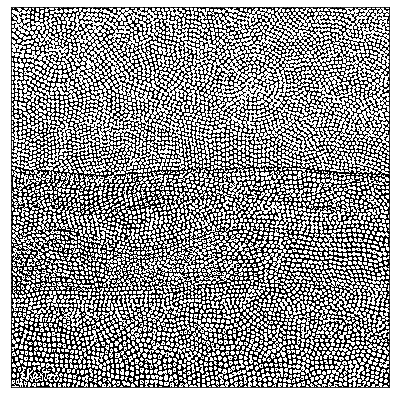

In [14]:
val_local=threshold_local(pintura_puntos, 35,  'gaussian')
img_local_gaussian = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local_gaussian))
imshow(img_local_gaussian)
imagenes_cercanas["threshold_local-gaussian-35"]=img_local_gaussian

Se incrementa el parámetro de ventana y se mantiene el método de gauss para la función **threshold_local**, luego se obtiene un resultado muy parecido a la imagen objetivo ver Figura(1).

Nro. círculos: 4555


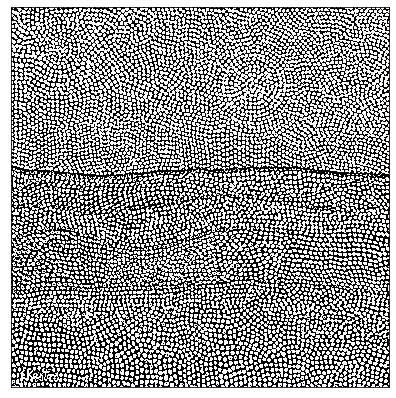

In [15]:
val_local=threshold_local(pintura_puntos, 55,  'gaussian')
img_local_gauss = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local_gauss))
imshow(img_local_gauss)
imagenes_cercanas["threshold_local-gaussian-55"]=img_local_gauss

### Análisis umbral threshold_niblack

El algoritmo utiliza una función **threshold_niblack** T para cada píxel en la imagen: T = m (x, y) - k * s (x, y) donde m y s son la media y la desviación estándar de la vecindad de píxeles (x, y) y k es un parámetro configurable que pondera el efecto de la desviación estándar.

Se utiliza una ventana de 5 pixeles y el valor de k=0.8. Se implementa la función **threshold_niblack**, el resultado está muy lejos de la Figura(1). Luego, se realizará una serie de pruebas actualizando los parámetros.

Nro. círculos: 0


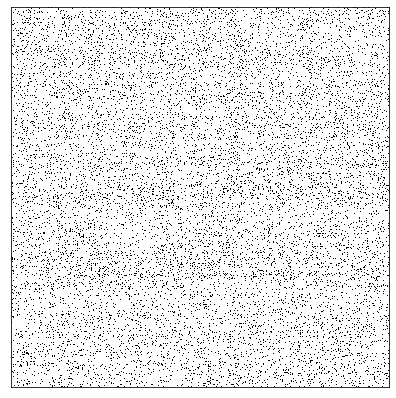

In [16]:
val_niblack=threshold_niblack(pintura_puntos, window_size=5, k=0.8)
img_niblack = pintura_puntos>val_niblack
print("Nro. círculos:",contar_regiones(img_niblack))
imshow(img_niblack)

Se modifica los parámetros de ventana y el valor k del algoritmo **threshold_niblack**, luego se obtiene un resultado que está muy lejos de la imagen objetivo ver Figura(1).

Nro. círculos: 30


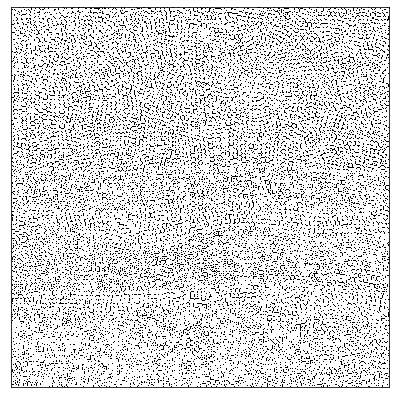

In [17]:
val_niblack=threshold_niblack(pintura_puntos, window_size=11, k=0.8)
img_niblack = pintura_puntos>val_niblack
print("Nro. círculos:",contar_regiones(img_niblack))
imshow(img_niblack)

Se optó por modificar el valor de la ventana y k, luego se obtiene un resultado parecido a la imagen objetivo ver Figura(1).

Nro. círculos: 3741


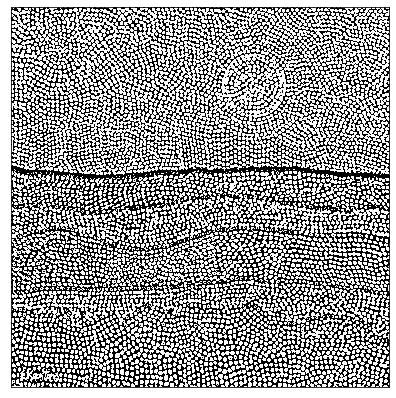

In [18]:
val_niblack=threshold_niblack(pintura_puntos, window_size=55, k=0.1)
img_niblack = pintura_puntos>val_niblack
print("Nro. círculos:",contar_regiones(img_niblack))
imshow(img_niblack)
imagenes_cercanas["threshold_niblack-55-0.1"]=img_niblack

Se modifica nuevamente los parámetros, luego el resultado es muy parecido a la imagen objetivo ver Figura(1). El número de círculos encontrados en la imagen se puede considerar como representativo.

Nro. círculos: 4034


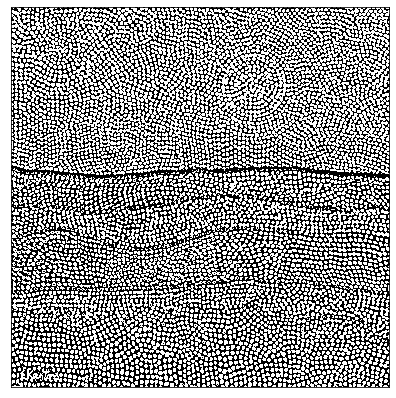

In [19]:
val_niblack=threshold_niblack(pintura_puntos, window_size=41, k=0.02)
img_niblack = pintura_puntos>val_niblack
print("Nro. círculos:",contar_regiones(img_niblack))
imshow(img_niblack)
imagenes_cercanas["threshold_niblack-41-0.02"]=img_niblack

### Análisis umbral threshold_sauvola

El algoritmo utiliza una función **threshold_niblack** T para cada píxel en la imagen: T = m(x,y) * (1 + k * ((s(x,y) / R) - 1)) donde m y s son la media y la desviación estándar de la vecindad de píxeles (x, y) y k es un parámetro configurable que pondera el efecto de la desviación estándar y R es el valor máximo de desviación estándar de la imagen.

Se utiliza una ventana = 15 pixeles y el valor de k=0.2. Se implementa la función **threshold_sauvola**, el resultado está muy lejos del posible resultado ver Figura(1). Luego, se realizará una serie de pruebas actualizando los parámetros.

Nro. círculos: 2296


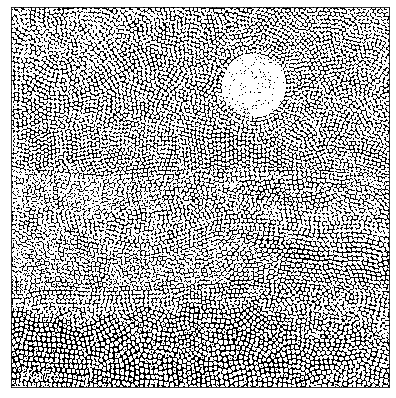

In [20]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=15, k=0.2)
img_sauvola = pintura_puntos > val_sauvola
print("Nro. círculos:",contar_regiones(img_sauvola))
imshow(img_sauvola)

Se optó por modificar el valor de la ventana y k, luego se obtiene un resultado poco parecido a la imagen objetivo ver Figura(1).

Nro. círculos: 2153


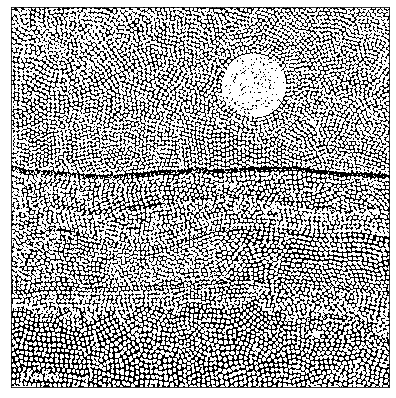

In [21]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=55, k=0.2)
img_sauvola = pintura_puntos > val_sauvola
print("Nro. círculos:",contar_regiones(img_sauvola))
imshow(img_sauvola)

Se optó por modificar el valor de la ventana y k, luego se obtiene resultado muy parecido a la imagen objetivo ver Figura(1). El número de círculos encontrados en la imagen se puede considerar como representativo.

Nro. círculos: 4096


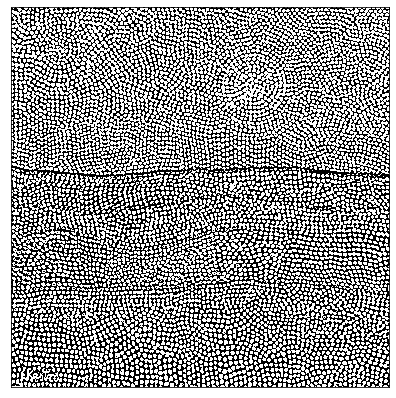

In [22]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=31, k=0.02)
img_sauvola = pintura_puntos > val_sauvola
print("Nro. círculos:",contar_regiones(img_sauvola))
imshow(img_sauvola)
imagenes_cercanas["img_sauvola-31-0.02"]=img_sauvola

# Morfología matemática

Existen diferentes **tipos de elementos estructurales** como son el disco, rectángulo, diamante. Para este laboratorio se utilizará la figura **disco**, debido a que es el elemento estructural que más se parece a la forma de las piedras.
Adicionalmente para los **diferentes operadores morfológicos** se implementará sucesivamente **discos de tamaño 1** debido a que se quiere evitar la pérdida de figuras por este proceso.
* **Nota:** Se empleará la morfología matemática únicamente sobre las imágenes que en del punto anterior que se consideraron como representativas respecto de la cantidad de discos y muy parecidas a la imagen objetivo.


## Análisis morfología imagen threshold_local

Para empezar con el procesamiento de la imagen se realiza varias erosiones de forma sucesiva y se evaluara el resultado. Con el objetivo de poder reducir la parte colindante entre las piedras, y poder contar los objetos por separado.

Nro círculos: 8115


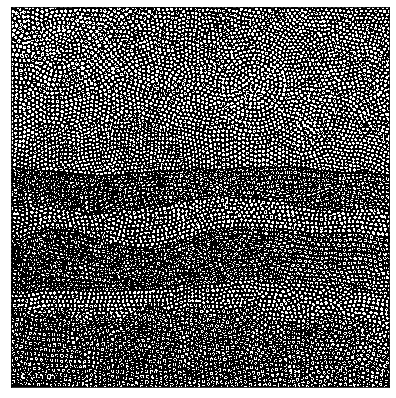

In [23]:
im_erosion1 = erosion(img_local, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
print("Nro círculos:",contar_regiones(im_erosion2))
imshow(im_erosion2)

Se realiza una erosión adicional para validar si existe un mayor número de círculos, pero como se puede observar aparecen muchos espacios vacíos por efecto de la erosión.

Nro círculos: 9626


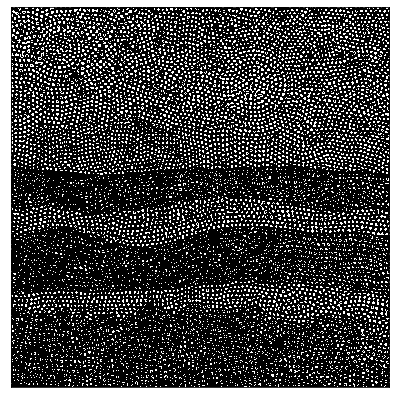

In [24]:
im_erosion3 = erosion(im_erosion2, disk(1))
print("Nro círculos:",contar_regiones(im_erosion3))
imshow(im_erosion3)

Se realizará una operación de cierre sobre la imagen erosionada 4 veces. Pero como se observa no existe ninguna mejora respecto del número de círculos.

Nro círculos: 8115


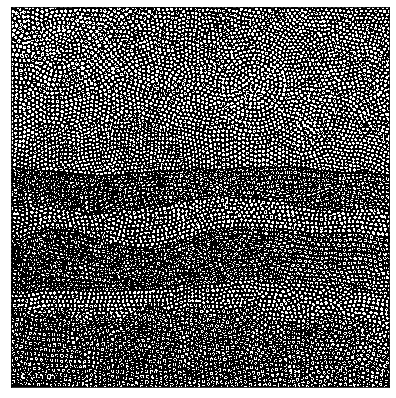

In [25]:
im_closing1 = closing(im_erosion2, disk(1))
print("Nro círculos:",contar_regiones(im_closing1))
imshow(im_closing1)

Sobre la imagen anterior se realiza una apertura ya que conserva el tamaño y las proporciones de la imagen original. En este caso incrementa el número de círculos.

Nro círculos: 9543


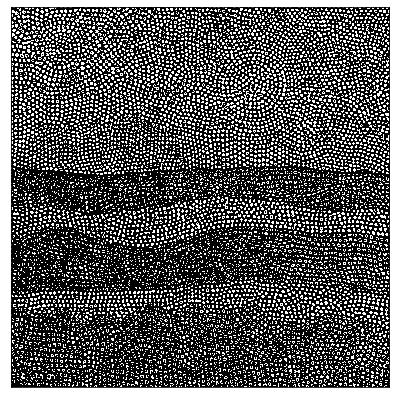

In [26]:
opening1 = opening(im_closing1, disk(1))
print("Nro círculos:",contar_regiones(opening1))
imshow(opening1)

Finalmente se llena aquellos circulo que producto de la aperutra y cierre tienes espacios vacios en el centro y por tanto lo mejor es llenarlos.

Nro círculos: 9533


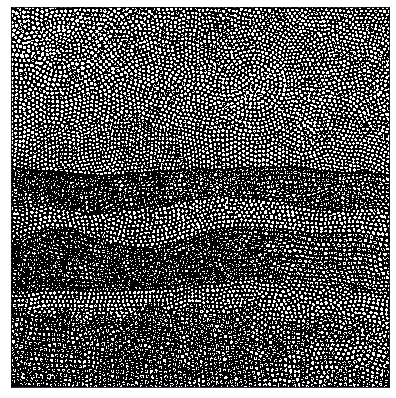

In [27]:
im_fill1 = ndi.binary_fill_holes(opening1, disk(1))
print("Nro círculos:",contar_regiones(im_fill1))
imshow(im_fill1)

Descripción del algoritmo:
 * Operar varias erosiones.
 * Aplicar acciones de apertura y clausura.
 * Cerrar los espacios vacíos.

Luego aparentemente puede existir un patrón que utilizaremos en el resto de imágenes para validar sus resultados.

## Análisis morfología imagen threshold_local método gauss

Se procesará la imagen con varias erosiones de forma sucesiva y se evaluará el resultado. Con el objetivo de poder reducir la parte colindante entre las piedras, y poder contar los objetos por separado.

Nro círculos: 7533


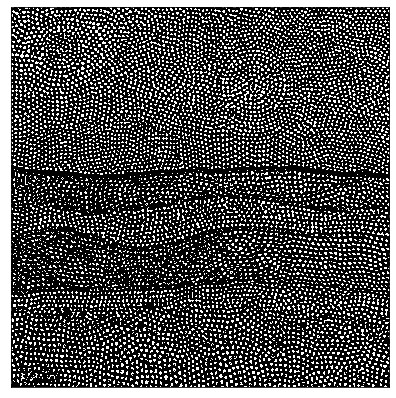

In [28]:
im_erosion1 = erosion(img_local_gauss, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
print("Nro círculos:",contar_regiones(im_erosion3))
imshow(im_erosion3)

Se realiza una erosión adicional para validar si existe un mayor número de círculos, pero como se puede observar aparecen muchos espacios vacíos por efecto de la erosión.

Nro círculos: 7621


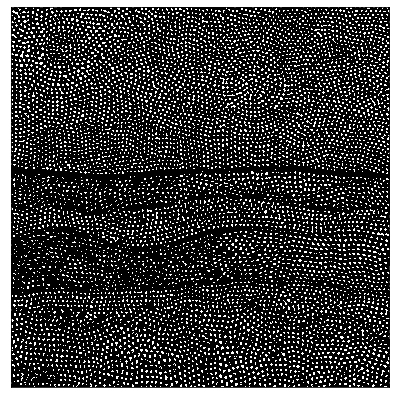

In [29]:
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro círculos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Se aplica una apertura, una clausura y un cierre de los espacios vacíos en el centro.

Nro círculos: 7648


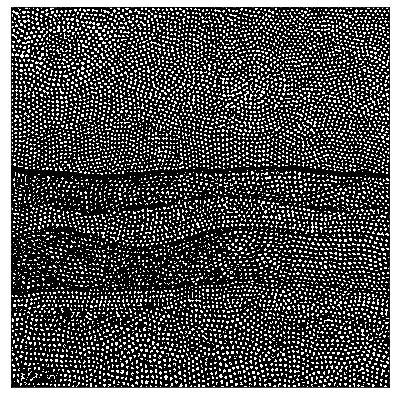

In [30]:
img_opening1 = opening(im_erosion3, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro círculos:",contar_regiones(img_fill1))
imshow(img_fill1)

## Análisis morfología imagen img_niblack

Se procesará la imagen con varias erosiones de forma sucesiva y se evaluará el resultado. Con el objetivo de poder reducir la parte colindante entre las piedras, y poder contar los objetos por separado.

Nro círculos: 7400


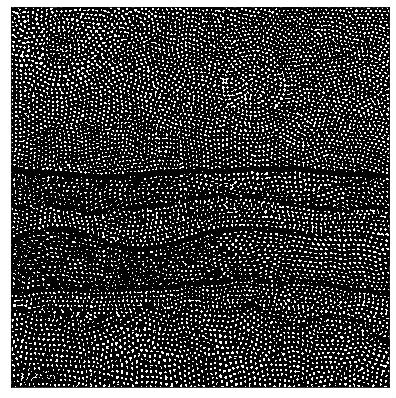

In [31]:
im_erosion1 = erosion(img_niblack, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro círculos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Se aplica una apertura, una clausura y un cierre de los espacios vacíos en el centro.

Nro círculos: 7380


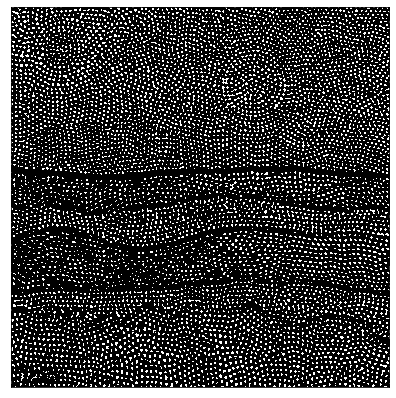

In [32]:
img_opening1 = opening(im_erosion4, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro círculos:",contar_regiones(img_fill1))
imshow(img_fill1)

## Análisis morfología imagen img_sauvola

Se procesará la imagen con varias erosiones de forma sucesiva y se evaluará el resultado. Con el objetivo de poder reducir la parte colindante entre las piedras, y poder contar los objetos por separado.

Nro círculos: 7624


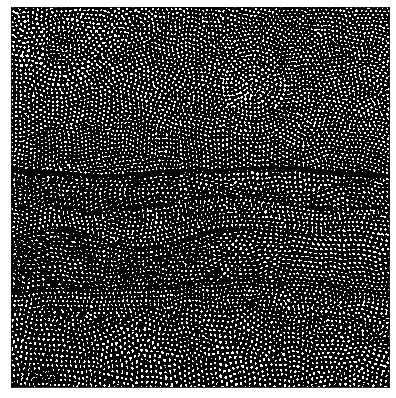

In [33]:
im_erosion1 = erosion(img_sauvola, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro círculos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Nro círculos: 7632


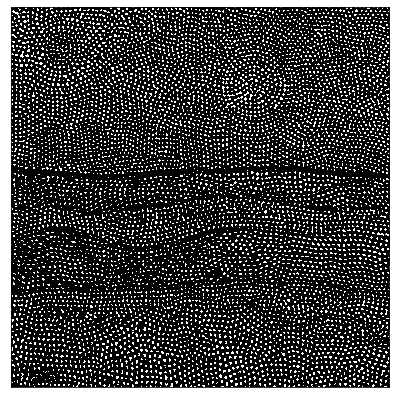

In [34]:
img_opening1 = opening(im_erosion4, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro círculos:",contar_regiones(img_fill1))
imshow(img_fill1)

# 2.- Seguna propuesta - Procesamiento

En esta propuesta se desarrollará bajo los siguientes criterios:
* Se definirán funciones que se ejecutarán de forma iterativa siempre buscando maximizar el número de círculos detectados, pero estos estarán sujetos a las dimensiones máximas y mínimas de las regiones detectadas. 
* Se definirá el conjunto de operadores.
* Se procesará todas las imágenes consideradas que se consideraron representativas durante la aplicación de los umbrales adaptativos.
* Se mostrará una lista con el top de imágenes detectas con la cantidad de los círculos y la descripción de los algoritmos para llegar a ese resultado.


### Lista de operadores morfológicos

In [35]:
operadores = {"erosion":erosion,"apertura":opening,"cierre":closing,
              "relleno":ndi.binary_fill_holes,"dilatacion":dilation}

### Funciones

Definiremos la función **procesar_operador_imagen** la cual realizara la cualquier operación morfológica y cualquier elemento estructural sobre una imagen de forma iterativa. Si detecta que la cantidad de círculos luego de varias erosiones sucesivas es menor se detiene.

In [36]:
def procesar_operador_imagen(imagen,ndimesion,operador=erosion,forma=disk):
    total_circulos = 0
    img_resultado = imagen
    tamanio_disco = 0
    iteracion = 0
    for n in range(1,ndimesion):        
        imagen_res = operador(img_resultado, forma(1))
        ncirculos = contar_regiones(imagen_res)
        if(ncirculos<total_circulos):
            break
        total_circulos = ncirculos           
        img_resultado = imagen_res        
        iteracion = n
    return img_resultado,ncirculos,iteracion

La función **ordenar_operadores** ordena la lista de imágenes con una operación por número de círculos de mayor a menor.

In [37]:
def ordenar_operadores(lista_imagen_operador):
    return sorted(lista_imagen_operador.items(), key=lambda x: x[1]['ndiscos'], reverse=True)

La función **maximizar_operador** obtiene la mejor operación ejecutada sobre la imagen.

In [38]:
def maximizar_operador(lista_imagen_operador):
    lista_ordenada = ordenar_operadores(lista_imagen_operador)
    return lista_ordenada[0]

La función **procesamiento_mejor_operador** en cada iteración procesara todos los operadores y los agregara a una lista. El resultado de la imagen identificada con el mayor número de círculos será utilizado como parámetro para la siguiente iteración. Esta función devuelve la imagen resultado, el número de círculos detectados y las acciones ejecutadas para llegar a ese resultado.

In [39]:
def procesamiento_mejor_operador(imagen,operadores,forma=disk):
    img_resultado = imagen
    ncirculos = 0
    acciones = {}
    nom_max_operacion = ""
    nom_ant_operacion = ""
    agregar_operacion = True
    for n in range(1,n_iteraciones):
        lista_img_operadores={} 
        agregar_operacion = True
        for nom_operador in operadores.keys():            
            operador=operadores[nom_operador]  
            if nom_operador == nom_ant_operacion:
                continue
            img,ndis,itera = procesar_operador_imagen(img_resultado,
                                                n_iteraciones,
                                                operador=operador,
                                                forma=disk)
            lista_img_operadores[nom_operador]={"ndiscos":ndis,
                                           "iteracion":itera,
                                           "operador":nom_operador,
                                           "imagen":img}    
        max_operacion = maximizar_operador(lista_img_operadores) 
        nom_max_operacion = max_operacion[0]
        if nom_ant_operacion != nom_max_operacion:
            nom_ant_operacion = nom_max_operacion
            ncirculos = max_operacion[1]['ndiscos']
            img_resultado = max_operacion[1]['imagen']
            acciones["Accion-"+str(n)] = "Operador:{0}, Iteraciones:{1}, Nro. círculos:{2}".format(
                max_operacion[1]['operador'],max_operacion[1]['iteracion'],max_operacion[1]['ndiscos'])
    return img_resultado,ncirculos,acciones

La función **mostar_top_imagenes** mostrará una lista con el top de imágenes detectas.

In [40]:
def mostar_top_imagenes(lista_imagenes_ordenada):
    contador = 0
    for item in lista_imagenes_ordenada:
        if contador>=max_top_imagenes:
            break        
        nombre = item[0]       
        ncirculos = item[1]['ndiscos']
        img_resultado = item[1]['imagen']
        print('Nro. círculos: {0} Algoritmo: {1}'.format(ncirculos,nombre))
        print("Acciones:",item[1]['acciones'])
        contador += 1
        imshow(img_resultado)    

### Ejecución del algoritmo sobre varias imágenes.

In [41]:
lista_algortimo_img_dicos = {}
for nombre_imagen in imagenes_cercanas.keys():    
    try:
        img,ndis,acciones = procesamiento_mejor_operador(imagenes_cercanas[nombre_imagen],
                                                         operadores)        
        lista_algortimo_img_dicos[nombre_imagen]={"nimagen":nombre_imagen,
                                                  "ndiscos":ndis,
                                                  "acciones":acciones,
                                                  "imagen":img}
    except RuntimeError:
      print("Error al seleccionar el tipo estructural")    

### Resultados top imágenes x Nro. de círculos

Nro. círculos: 9611 Algoritmo: threshold_local_mean-15
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:3, Nro. círculos:9626', 'Accion-2': 'Operador:cierre, Iteraciones:3, Nro. círculos:9626', 'Accion-3': 'Operador:relleno, Iteraciones:3, Nro. círculos:9611'}


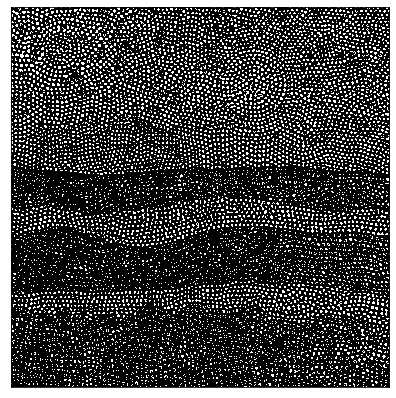

Nro. círculos: 8204 Algoritmo: threshold_local-gaussian-35
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:3, Nro. círculos:8210', 'Accion-2': 'Operador:cierre, Iteraciones:3, Nro. círculos:8210', 'Accion-3': 'Operador:relleno, Iteraciones:3, Nro. círculos:8204'}


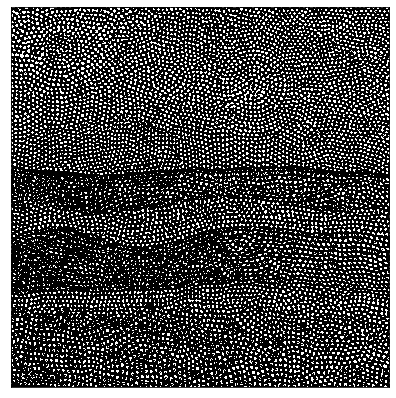

Nro. círculos: 7696 Algoritmo: threshold_local_mean-27
Acciones: {'Accion-1': 'Operador:erosion, Iteraciones:3, Nro. círculos:7511', 'Accion-2': 'Operador:apertura, Iteraciones:3, Nro. círculos:7697', 'Accion-3': 'Operador:relleno, Iteraciones:3, Nro. círculos:7696'}


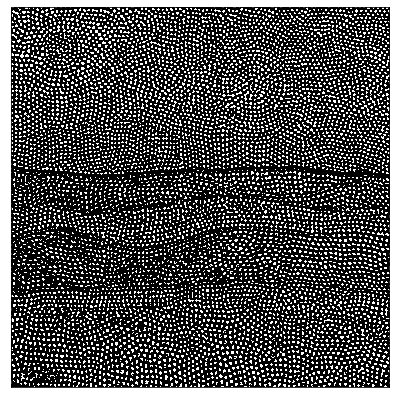

In [42]:
lista_ordenada = ordenar_operadores(lista_algortimo_img_dicos)
mostar_top_imagenes(lista_ordenada)        

# 3.- Tercera propuesta - Teorema de empaquetamiento

Utilizando el teorema de empaquetamiento de círculos, las propiedades de regiones de skimage y con el cálculo de varios radios y pesos en función de muestras tomadas de la imagen; se buscará maximizar el número de círculos contenidos en las dimensiones de la imagen.

Figura(2) Muestras de longitudes:

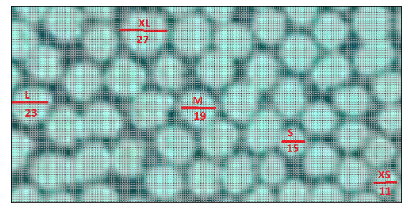

In [43]:
imshow(io.imread(fname='img/Muestras.PNG'))

### Lista de longitudes tomadas de la figura anterior

In [44]:
tamanios={"xs":11,"s":15,"m":19,"l":23,"xl":27}

### Funciones

La función **calcular_radio** permite calcular el radio de la imagen utilizando las propiedades de la región y con el uso de la distancia euclidiana.

In [45]:
def calcular_radio(region):
    y0, x0 = region.centroid
    orientation = region.orientation                
    x2 = x0 - math.sin(orientation) * 0.5 * region.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * region.major_axis_length                
    radio = math.sqrt(pow(x2-x0,2)+pow(y2-y0,2))
    return radio

La función **calcular_ncirculos_pesos_radios** calcula los radios de las diferentes regiones que se encuentren dentro de los valores de tolerancia. Realiza un promedio del valor de los radios detectados para cada muestra. Adicionalmente para los diferentes tamaños de las muestras extrae el número de piedras que se encuentran dentro de ese conjunto. Una vez calculado el número de círculos de cada tipo lo divide para la cantidad detectada para sacar los pesos.

In [66]:
def calcular_ncirculos_pesos_radios(imagen,tamanios):    
    label_imagen = label(imagen)    
    ncirculos = 0
    totales = {}
    max_radios = {}
    for key_tam in tamanios.keys():
        totales[key_tam] = 0
        max_radios[key_tam] = 0
    for region in regionprops(label_imagen):
        for key_tam in tamanios.keys():
            tamanio = tamanios[key_tam]
            min_radio = (tamanio-tolerancia)/2
            max_radio = (tamanio+tolerancia)/2
            radio = calcular_radio(region)
            if min_radio < radio and radio<max_radio:                
                rad_tam = max_radios[key_tam]
                max_radios[key_tam] = (max_radios[key_tam] + radio)/2
                totales[key_tam] = totales[key_tam] + 1
                ncirculos=ncirculos+1
                break
    pesos = {}
    for key_tam in tamanios.keys():
        pesos[key_tam] = totales[key_tam]/ncirculos    
    return ncirculos,totales,pesos,max_radios

La función generar_radios_pesos transforma los diccionarios en listas para ser utilizados como parámetros en las funciones para generar una distribución de los radios de las imágenes en función de sus pesos. *np.random.choice(self.lista_radios,self.n,p=self.lista_pesos)*

In [47]:
def generar_radios_pesos(tamanios,pesos):
    lista_radios = []
    lista_pesos = []
    for key_tam in tamanios.keys():
        radio = tamanios[key_tam]
        lista_radios.append(radio)
    for key_pes in pesos.keys():
        peso = pesos[key_pes]
        lista_pesos.append(peso)
    lista_pesos = np.array(lista_pesos)
    lista_pesos /= lista_pesos.sum()
    return lista_radios,lista_pesos

### Clases

La clase **Circulo** es utilizada para representar y graficar los círculos.

In [48]:
class Circulo:
    def __init__(self, cx, cy, r, icolour=None):        
        self.cx, self.cy, self.r = cx, cy, r
        self.icolour = icolour
        
    def valida_sobre_posicion(self, cx, cy, r):
        d = np.hypot(cx-self.cx, cy-self.cy)
        return d < r + self.r
    
    def dibujar_circulo(self, fo):
        print('<circle cx="{}" cy="{}" r="{}" class="c{}"/>'
            .format(self.cx, self.cy, self.r, self.icolour), file=fo)

La clase **Procesador** es la encargada de realizar la generación de los círculos de forma aleatoria y distribuirlos en las dimensiones de la imagen. El método **agregar_circulo** es el que permite agrega un circulo y permite validar que no exista sobre posición entre ellos haciendo referencia al teorema del empaquetamiento de círculos. Esta clase también permite la generación de un archivo en formato svg. El método **crear_circulos_aletorios** devolvera la cantidad de círculos que pudieron ser insertados dentro de las dimensiones de la imagen.

In [93]:
class Procesador:
    def __init__(self,n, alto, ancho,lista_radios,lista_pesos,
                 rho_min=0.005,rho_max=0.05):        
        self.alto,self.ancho = alto,ancho
        self.lista_radios = lista_radios
        self.lista_pesos = lista_pesos
        R = int(ancho/2)
        if alto<ancho:
            R = int(alto/2)        
        self.R, self.n = R, n   
        self.CX, self.CY = self.ancho // 2, self.alto // 2
        self.rmin, self.rmax = R * rho_min, R * rho_max
        self.colores = ['#993300', '#a5c916', '#00AA66', '#FF9900']

    def cabecera_imagen(self):
        print('<?xml version="1.0" encoding="utf-8"?>\n'
        '<svg xmlns="http://www.w3.org/2000/svg"\n' + ' '*5 +
          'xmlns:xlink="http://www.w3.org/1999/xlink" width="{}" height="{}" >'
                .format(self.ancho, self.alto), file=self.fo)

    def decorador(func):
        def wrapper(self):
            print("""
            <defs>
            <style type="text/css"><![CDATA[""", file=self.fo)
            func(self)
            print("""]]></style>
            </defs>""", file=self.fo)
        return wrapper

    @decorador
    def estilos_svg(self):
        print('circle {stroke: none;}', file=self.fo)
        for i, c in enumerate(self.colores):
            print('.c{} {{fill: {};}}'.format(i, c), file=self.fo)

    def crear_svg(self, nombre_archivo, *args, **kwargs):
        ncolours = len(self.colores)
        with open(nombre_archivo, 'w') as self.fo:
            self.cabecera_imagen()
            self.estilos_svg()
            for circulo in self.circulos:
                circulo.dibujar_circulo(self.fo)
            print('</svg>', file=self.fo)

    def agregar_circulo(self, r):        
        guard = int(len(self.circulos)*100/5000)+2
        while guard:            
            cr, cphi = (2 *self.R * np.sqrt(np.random.random()),
                        2 *self.R * np.random.random())
            cx, cy = cr * np.cos(cphi), cr * np.sin(cphi)            
            dimX = cx+self.CX+r
            dimY = cy+self.CY+r
            if 0<dimX<self.alto and 0<dimY<self.ancho:            
                if not any(circulo.valida_sobre_posicion(self.CX+cx, self.CY+cy, r)
                                    for circulo in self.circulos):  
                    if cx+self.CX+r>self.alto:
                        print('alto')
                    if cy+self.CY>self.ancho:
                        print('ancho')
                    circulo = Circulo(cx+self.CX, cy+self.CY, r,
                                icolour=np.random.randint(len(self.colores)))
                    self.circulos.append(circulo)
                    return
            guard -= 1      
    def crear_circulos_aletorios(self):        
        self.circulos = []
        radios = np.random.choice(self.lista_radios,self.n,p=self.lista_pesos)        
        for radio in radios:
            self.agregar_circulo(radio)
        return len(self.circulos)

### Ejecución funciones calculo radios y pesos.

In [83]:
ncirculos,totales,pesos,max_radios = calcular_ncirculos_pesos_radios(img_local_gauss,tamanios)
lista_radios,lista_pesos = generar_radios_pesos(max_radios,pesos)
print("Nro. total círculos :",ncirculos)
print("Nro. círculos por tipo:",totales)
(alto,ancho) = pintura_puntos.shape
print("Dimensiones imagen original {0} x {1} píxeles".format(ancho,alto))
print("Radios:",lista_radios)
print("Pesos:",lista_pesos)

Nro. total círculos : 4197
Nro. círculos por tipo: {'xs': 118, 's': 1385, 'm': 2159, 'l': 480, 'xl': 55}
Dimensiones imagen original 1920 x 1930 píxeles
Radios: [5.239655956616022, 8.423105271665579, 10.005136547973029, 12.296963031263289, 14.23215959097352]
Pesos: [0.02811532 0.32999762 0.51441506 0.11436741 0.0131046 ]


### Procesar teorema de empaquetamiento.
**Nota:** Se utilizarán n=20000 para simular la máxima cantidad de círculos que se buscará distribuir dentro de la imagen.

In [95]:
procesador = Procesador(20000,alto,ancho,lista_radios,lista_pesos)
nciruclos = procesador.crear_circulos_aletorios()
print("Nro. círculos:",nciruclos)
procesador.crear_svg('circulos.svg')

Nro. círculos: 7300


 El resultado obtenido es el siguiente:

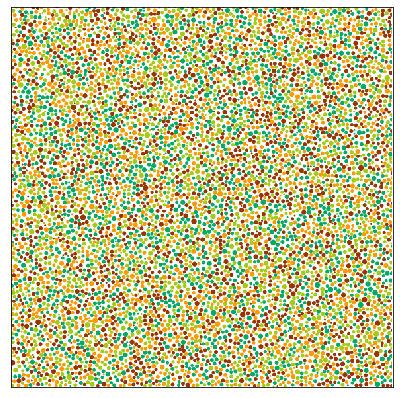

In [96]:
imshow(io.imread(fname='img/circulos.PNG'))

# Conclusiones

* Los umbrales adaptivos brindan una solución muy óptima para realizar el pre-procesamiento de una imagen.
* Se puede tomar ventaja de los elementos de las regiones y etiquetas de la imagen para realizar filtros y apreciaciones en caso de buscar regiones y/o objetos específicos.
* Los elementos estructurales generalmente deben corresponder a la forma objeto que se desea realizar el procesamiento.
* Existen otras técnicas que en conjunción pueden brindar soluciones más exactas.
* En la actualidad varios de los problemas de procesamiento de imágenes se basan en métodos basados en la capacidad de procesamiento de los ordenadores.

# Bibliografía

* Weisstein,  E.  W.(2020).Circle  packing.Descargado el 06 de mayo de 2020, desde https://mathworld.wolfram.com/CirclePacking.html
* Christian.(2019).Packing  circles  in  a  circle.Descargado  06 de mayo de 2020, desde https://scipython.com/blog/packing-circles-in-a-circle/
* Spicy Community,S.(2014).numpy.random.choice—numpyv1.9manual.Descargado el 07 de mayo de 2020, desde https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.choice.html
* Measure region properties. (n.d.). Descargado el 07 de mayo de 2020, desde https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html
* Wikipedia contributors. (2020, Mayo 11). Otsu's method. In Wikipedia, The Free Encyclopedia. Descargado el 07 de mayo de 2020, desde https://en.wikipedia.org/w/index.php?title=Otsu%27s_method&oldid=956139805
* Empaquetamiento de círculos. (2020, 8 de junio). Wikipedia, La enciclopedia libre. Descargado el 09 de junio 2020, desde https://es.wikipedia.org/w/index.php?title=Empaquetamiento_de_c%C3%ADrculos&oldid=126770325.